# Transfer Learning using PSI

A Pap smear, also called a Pap test, is a procedure to test for cervical cancer in women. A Pap smear involves collecting cells from your cervix — the lower, narrow end of your uterus that's at the top of your vagina. Detecting cervical cancer early with a Pap smear gives you a greater chance at a cure.

In [1]:
import numpy as np
import pandas as pd
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [2]:
import cv2
import numpy as np
import os

def preprocess_images_in_folders(root_folder, target_size=(224, 224)):
    all_preprocessed_images = []

    # Iterate over all subfolders in the root folder
    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)

        # Check if the path is a directory
        if os.path.isdir(folder_path):
            print(f"Processing images in folder: {folder_name}")

            # Preprocess images in the current folder
            preprocessed_images = preprocess_images_in_folder(folder_path, target_size)

            # Extend the list of all preprocessed images
            all_preprocessed_images.extend(preprocessed_images)

    return all_preprocessed_images

def preprocess_images_in_folder(folder_path, target_size=(224, 224)):
    preprocessed_images = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.bmp')):
            # Construct the full path to the image
            image_path = os.path.join(folder_path, filename)

            # Preprocess the image
            preprocessed_image = preprocess_image(image_path, target_size)

            # Append the preprocessed image to the list
            preprocessed_images.append(preprocessed_image)

    return preprocessed_images

def preprocess_image(image_path, target_size=(224, 224)):
    # Read the image
    image = cv2.imread(image_path)

    # Resize the image
    image = cv2.resize(image, target_size)

    # Convert the image to grayscale (optional, depending on your task)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize pixel values to be between 0 and 1
    image = image.astype(np.float32) / 255.0

    # You can apply additional preprocessing steps here based on your requirements

    return image

# Example usage
root_folder = "C:/Users/91898/Downloads"
all_preprocessed_images = preprocess_images_in_folders(root_folder)


Processing images in folder: .ipynb_checkpoints
Processing images in folder: New folder
Processing images in folder: one_hot_labels


In [3]:
import os
import random
import shutil

main_folder_path = "C:/Users/91898/Downloads/New folder_1"
client_paths = ["C:/Users/91898/Downloads/New folder_1/client1", "C:/Users/91898/Downloads/New folder_1/client2", "C:/Users/91898/Downloads/New folder_1/client3", "C:/Users/91898/Downloads/New folder_1/client4"]
desired_distribution = {
    'im_Dyskeratotic': [270, 156, 106, 81],
    'im_Koilocytotic': [98, 109, 121, 190],
    'im_Metaplastic': [124, 139, 89, 241],
    'im_Parabasal': [152, 84, 234, 117],
    'im_Superficial-Intermediate': [173, 131, 204, 113]
}

# Initialize client data dictionaries
client_data = {client: {} for client in client_paths}

# Iterate through the classes
for class_folder in desired_distribution:
    class_path = os.path.join(main_folder_path, class_folder)

    # Check if the item is a directory (asubfolder)
    if os.path.isdir(class_path):
        class_images = os.listdir(class_path)
        random.shuffle(class_images)  # Shuffle images randomly

        # Iterate through clients and assign images
        for i, client in enumerate(client_paths):
            start = sum(desired_distribution[class_folder][:i])
            end = sum(desired_distribution[class_folder][:i + 1])

            # Check if the client path exists in the dictionary
            if client in client_data:
                client_data[client].setdefault(class_folder, []).extend(class_images[start:end])


# Copy images to the corresponding client folders
for client, distribution in client_data.items():
    client_folder = os.path.join(client)
    os.makedirs(client_folder, exist_ok=True)

    for class_folder, images in distribution.items():
        class_path = os.path.join(main_folder_path, class_folder)
        dest_path = os.path.join(client_folder, class_folder)
        os.makedirs(dest_path, exist_ok=True)

        for image in images:
            src_path = os.path.join(class_path, image)
            dest_image_path = os.path.join(dest_path, image)
            shutil.copy(src_path, dest_image_path)


In [4]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data1():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    train_data = datagen.flow_from_directory(
        directory="C:/Users/91898/Downloads/New folder_1/client1",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return train_data

In [5]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data2():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    train_data = datagen.flow_from_directory(
        directory="C:/Users/91898/Downloads/New folder_1/client2",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return train_data

In [6]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data3():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    train_data = datagen.flow_from_directory(
        directory="C:/Users/91898/Downloads/New folder_1/client3",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return train_data

In [7]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data4():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    train_data = datagen.flow_from_directory(
        directory="C:/Users/91898/Downloads/New folder_1/client4",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return train_data

In [8]:
train1=load_img_data1()
train2=load_img_data2()
train3=load_img_data3()
train4=load_img_data4()

Found 817 images belonging to 5 classes.
Found 619 images belonging to 5 classes.
Found 754 images belonging to 5 classes.
Found 742 images belonging to 5 classes.


In [9]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# def one_hot_encode_labels(labels):
#     # Your one_hot_encode_labels function here
def on_hot_encode_labels(lables):
    aug_list=[]
    for i in range(len(lables)):
        if lables[i]==0:
            aug_list.append([0,1,0,0,0])
        elif lables[i]==1:
            aug_list.append([1,0,0,0,0])
        elif lables[i]==2:
            aug_list.append([0,0,1,0,0])
        elif lables[i]==3:
            aug_list.append([0,0,0,1,0])
        elif lables[i]==4:
            aug_list.append([0,0,0,0,1])
    return aug_list

In [10]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

def load_img_data(test_data):
    img_size = (128, 128)

    # Load images and labels into numpy arrays
    images = []
    labels = []
    for batch in test_data:
        images.extend(batch[0])  # Load images from the batch
        labels.extend(np.argmax(batch[1], axis=1))  # Convert one-hot labels to integers
        if len(labels) >= len(test_data.filenames):
            break

    # Convert labels to one-hot encoded format
    one_hot_labels = on_hot_encode_labels(labels)

    return np.array(images), np.array(one_hot_labels)


In [11]:
train1, label1 = load_img_data(train1)
train2, label2 = load_img_data(train2)
train3, label3 = load_img_data(train3)
train4, label4 = load_img_data(train4)

In [12]:
train1=train1/255
train2=train2/255
train3=train3/255
train4=train4/255

In [13]:
import os
import random
import shutil

main_folder_path = "C:/Users/91898/Downloads/New folder_1"
client_paths = ["C:/Users/91898/Downloads/New folder_1/test"]
desired_distribution = {
    'im_Dyskeratotic': [200],
    'im_Koilocytotic': [200],
    'im_Metaplastic': [200],
    'im_Parabasal': [200],
    'im_Superficial-Intermediate': [200]
}

# Initialize client data dictionaries
client_data = {client: {} for client in client_paths}

# Iterate through the classes
for class_folder in desired_distribution:
    class_path = os.path.join(main_folder_path, class_folder)

    # Check if the item is a directory (subfolder)
    if os.path.isdir(class_path):
        class_images = os.listdir(class_path)
        random.shuffle(class_images)  # Shuffle images randomly

        # Iterate through clients and assign images
        for i, client in enumerate(client_paths):
            start = sum(desired_distribution[class_folder][:i])
            end = sum(desired_distribution[class_folder][:i + 1])

            # Check if the client path exists in the dictionary
            if client in client_data:
                client_data[client].setdefault(class_folder, []).extend(class_images[start:end])

# # Print the resulting distribution for each client
# for client, distribution in client_data.items():
#     print(f"Client: {client}")
#     for class_folder, images in distribution.items():
#         print(f"  {class_folder}: {len(images)} images - {images[:5]}...")

# Copy images to the corresponding client folders
for client, distribution in client_data.items():
    client_folder = os.path.join(client)
    os.makedirs(client_folder, exist_ok=True)

    for class_folder, images in distribution.items():
        class_path = os.path.join(main_folder_path, class_folder)
        dest_path = os.path.join(client_folder, class_folder)
        os.makedirs(dest_path, exist_ok=True)

        for image in images:
            src_path = os.path.join(class_path, image)
            dest_image_path = os.path.join(dest_path, image)
            shutil.copy(src_path, dest_image_path)


In [14]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    test_data = datagen.flow_from_directory(
        directory="C:/Users/91898/Downloads/New folder_1/test",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return test_data

In [15]:
test=load_img_data()

Found 1000 images belonging to 5 classes.


In [16]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# def one_hot_encode_labels(labels):
#     # Your one_hot_encode_labels function here
def on_hot_encode_labels(lables):
    aug_list=[]
    for i in range(len(lables)):
        if lables[i]==0:
            aug_list.append([0,1,0,0,0])
        elif lables[i]==1:
            aug_list.append([1,0,0,0,0])
        elif lables[i]==2:
            aug_list.append([0,0,1,0,0])
        elif lables[i]==3:
            aug_list.append([0,0,0,1,0])
        elif lables[i]==4:
            aug_list.append([0,0,0,0,1])
    return aug_list

In [17]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

def load_img_data(test_data):
    img_size = (128, 128)

    # Load images and labels into numpy arrays
    images = []
    labels = []
    for batch in test_data:
        images.extend(batch[0])  # Load images from the batch
        labels.extend(np.argmax(batch[1], axis=1))  # Convert one-hot labels to integers
        if len(labels) >= len(test_data.filenames):
            break

    # Convert labels to one-hot encoded format
    one_hot_labels = on_hot_encode_labels(labels)

    return np.array(images), np.array(one_hot_labels)


In [18]:
test, one_hot_labels = load_img_data(test)

In [19]:
test=test/255

In [20]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models, optimizers

class SimpleMLP:
    @staticmethod
    def build():
        # Load the ResNet101V2 model as the base model
        base_model = tf.keras.applications.ResNet101V2(
            include_top=False, weights='imagenet', input_shape=(128, 128, 3)
        )
        
        # Freeze the base model's layers
        base_model.trainable = False

        # Create the transfer learning model by adding custom classification layers on top of the base model
        model = tf.keras.models.Sequential([
            base_model,
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(512, activation='relu'),
            # Optionally, you can add another dense layer
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(5, activation='softmax')  # Adjust the number of output classes accordingly
        ])

        # Compile the model
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

# Create an instance of the SimpleMLP model
simple_mlp_model = SimpleMLP.build()
global_model=simple_mlp_model

# Display the model summary
simple_mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 4, 4, 2048)        42626560  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 43741957 (166.86 MB)
Trainable params: 1115397 (4.25 MB)
Non-trainable params: 42626560 (162.61 MB)
________

In [21]:
def create_clients(data_dict):
    '''
    Return a dictionary with keys as client names and values as data and label lists.
    Args: data_dict: A dictionary where keys are client names, and values are tuples of data and labels.
                    For example, {'client_1': (data_1, labels_1), 'client_2': (data_2, labels_2), ...}
    Returns: A dictionary with keys as client names and values as tuples of data and label lists.
    '''
    return data_dict

import tensorflow as tf


def test_model(test, one_hot_labels,  model, comm_round):
    loss,accuracy=model.evaluate(test, one_hot_labels)
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, accuracy, loss))
    return accuracy, loss


def avg_weights(scaled_weight_list):
    '''Return the average of the listed scaled weights.'''
    num_clients = len(scaled_weight_list)

    if num_clients == 0:
        return None  # Handle the case where the list is empty

    avg_grad = list()

    # Get the sum of gradients across all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0) / num_clients
        avg_grad.append(layer_mean)

    return avg_grad


client_data = {
    'client_1': (train1,label1),
    'client_2': (train2,label2),
    'client_3': (train3,label3),
    'client_4': (train4,label4)
    
}

#create clients
clients_batched = create_clients(client_data)

In [22]:
client_names = list(clients_batched.keys())

In [23]:
train1.shape

(817, 128, 128, 3)

In [24]:
train2.shape

(619, 128, 128, 3)

In [25]:
train3.shape

(754, 128, 128, 3)

In [26]:
train4.shape

(742, 128, 128, 3)

In [27]:
one_hot_labels

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [28]:
comms_round = 30  # Number of global epochs
acc3 = []

for comm_round in range(comms_round):

    # Get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    # Initial list to collect local model weights after scaling
    local_weight_list = []

    # Randomize client data - using keys
    client_names = list(clients_batched.keys())
    random.shuffle(client_names)
    
    for client in tqdm(client_names, desc='Progress Bar'):
        local_model = SimpleMLP.build()

        local_model.compile(
            loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy']
        )

        # Set local model weight to the weight of the global model
        local_model.set_weights(global_weights)

        # Fit local model with client's data
        local_model.fit(
            np.array(clients_batched[client][0]),
            np.array(clients_batched[client][1]),
            epochs=2,
            batch_size=32,
            verbose= 2
        )

        # Get the scaled model weights and add to the list
        weights = local_model.get_weights()
        local_weight_list.append(weights)

        # Clear the session to free memory after each communication round
        K.clear_session()

    # Calculate the average weights across all clients for each layer
    average_weights = avg_weights(local_weight_list)

    # Update the global model with the average weights
    global_model.set_weights(average_weights)
    
    # Optionally, you can also test the global model at this point using a separate test dataset
    global_acc, global_loss = test_model(test, one_hot_labels, global_model, comm_round)
    acc3.append(global_acc)


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
20/20 - 22s - loss: 0.8804 - accuracy: 0.6446 - 22s/epoch - 1s/step
Epoch 2/2
20/20 - 15s - loss: 0.3096 - accuracy: 0.8885 - 15s/epoch - 742ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:43<02:10, 43.55s/it]

Epoch 1/2
24/24 - 27s - loss: 0.8485 - accuracy: 0.7082 - 27s/epoch - 1s/step
Epoch 2/2
24/24 - 22s - loss: 0.2339 - accuracy: 0.9151 - 22s/epoch - 915ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:38<01:41, 50.55s/it]

Epoch 1/2
26/26 - 28s - loss: 0.8356 - accuracy: 0.7099 - 28s/epoch - 1s/step
Epoch 2/2
26/26 - 24s - loss: 0.2548 - accuracy: 0.9094 - 24s/epoch - 908ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:37<00:54, 54.01s/it]

Epoch 1/2
24/24 - 26s - loss: 0.9127 - accuracy: 0.6456 - 26s/epoch - 1s/step
Epoch 2/2
24/24 - 23s - loss: 0.3774 - accuracy: 0.8801 - 23s/epoch - 940ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:32<00:00, 53.17s/it]


32/32 [==============================] - 26s 699ms/step - loss: 0.4023 - accuracy: 0.8370
comm_round: 0 | global_acc: 83.700% | global_loss: 0.4023454785346985


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
20/20 - 24s - loss: 0.4586 - accuracy: 0.8401 - 24s/epoch - 1s/step
Epoch 2/2
20/20 - 18s - loss: 0.2156 - accuracy: 0.9418 - 18s/epoch - 917ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:48<02:26, 48.87s/it]

Epoch 1/2
24/24 - 27s - loss: 0.4731 - accuracy: 0.8288 - 27s/epoch - 1s/step
Epoch 2/2
24/24 - 23s - loss: 0.2022 - accuracy: 0.9326 - 23s/epoch - 963ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:44<01:45, 53.00s/it]

Epoch 1/2
24/24 - 28s - loss: 0.3924 - accuracy: 0.8634 - 28s/epoch - 1s/step
Epoch 2/2
24/24 - 23s - loss: 0.1420 - accuracy: 0.9562 - 23s/epoch - 967ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:42<00:55, 55.11s/it]

Epoch 1/2
26/26 - 31s - loss: 0.4039 - accuracy: 0.8433 - 31s/epoch - 1s/step
Epoch 2/2
26/26 - 27s - loss: 0.1313 - accuracy: 0.9621 - 27s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:46<00:00, 56.66s/it]


32/32 [==============================] - 25s 740ms/step - loss: 0.2626 - accuracy: 0.9050
comm_round: 1 | global_acc: 90.500% | global_loss: 0.26261311769485474


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
26/26 - 28s - loss: 0.2667 - accuracy: 0.9155 - 28s/epoch - 1s/step
Epoch 2/2
26/26 - 25s - loss: 0.1058 - accuracy: 0.9694 - 25s/epoch - 946ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:59<02:57, 59.01s/it]

Epoch 1/2
24/24 - 27s - loss: 0.3688 - accuracy: 0.8504 - 27s/epoch - 1s/step
Epoch 2/2
24/24 - 22s - loss: 0.1389 - accuracy: 0.9596 - 22s/epoch - 931ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:55<01:55, 57.58s/it]

Epoch 1/2
24/24 - 28s - loss: 0.2879 - accuracy: 0.8899 - 28s/epoch - 1s/step
Epoch 2/2
24/24 - 23s - loss: 0.0867 - accuracy: 0.9708 - 23s/epoch - 960ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:53<00:57, 57.52s/it]

Epoch 1/2
20/20 - 25s - loss: 0.3058 - accuracy: 0.8885 - 25s/epoch - 1s/step
Epoch 2/2
20/20 - 20s - loss: 0.1192 - accuracy: 0.9709 - 20s/epoch - 998ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:44<00:00, 56.15s/it]


32/32 [==============================] - 25s 770ms/step - loss: 0.1921 - accuracy: 0.9310
comm_round: 2 | global_acc: 93.100% | global_loss: 0.1921495497226715


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
24/24 - 27s - loss: 0.2246 - accuracy: 0.9204 - 27s/epoch - 1s/step
Epoch 2/2
24/24 - 23s - loss: 0.0709 - accuracy: 0.9841 - 23s/epoch - 948ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:55<02:47, 55.81s/it]

Epoch 1/2
26/26 - 31s - loss: 0.1981 - accuracy: 0.9315 - 31s/epoch - 1s/step
Epoch 2/2
26/26 - 28s - loss: 0.0779 - accuracy: 0.9792 - 28s/epoch - 1s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:02<02:04, 62.12s/it]

Epoch 1/2
24/24 - 28s - loss: 0.2534 - accuracy: 0.9070 - 28s/epoch - 1s/step
Epoch 2/2
24/24 - 23s - loss: 0.1231 - accuracy: 0.9690 - 23s/epoch - 968ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [03:00<01:00, 60.21s/it]

Epoch 1/2
20/20 - 23s - loss: 0.2258 - accuracy: 0.9176 - 23s/epoch - 1s/step
Epoch 2/2
20/20 - 20s - loss: 0.0872 - accuracy: 0.9758 - 20s/epoch - 986ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:50<00:00, 57.58s/it]


32/32 [==============================] - 31s 941ms/step - loss: 0.1522 - accuracy: 0.9420
comm_round: 3 | global_acc: 94.200% | global_loss: 0.15219374001026154


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
20/20 - 28s - loss: 0.1821 - accuracy: 0.9305 - 28s/epoch - 1s/step
Epoch 2/2
20/20 - 32s - loss: 0.0705 - accuracy: 0.9742 - 32s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:05<03:15, 65.04s/it]

Epoch 1/2
24/24 - 41s - loss: 0.1837 - accuracy: 0.9420 - 41s/epoch - 2s/step
Epoch 2/2
24/24 - 33s - loss: 0.0733 - accuracy: 0.9730 - 33s/epoch - 1s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:25<02:28, 74.21s/it]

Epoch 1/2
26/26 - 43s - loss: 0.1690 - accuracy: 0.9437 - 43s/epoch - 2s/step
Epoch 2/2
26/26 - 34s - loss: 0.1158 - accuracy: 0.9596 - 34s/epoch - 1s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [03:48<01:18, 78.23s/it]

Epoch 1/2
24/24 - 46s - loss: 0.1813 - accuracy: 0.9310 - 46s/epoch - 2s/step
Epoch 2/2
24/24 - 34s - loss: 0.0651 - accuracy: 0.9814 - 34s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:15<00:00, 78.76s/it]


32/32 [==============================] - 43s 1s/step - loss: 0.1429 - accuracy: 0.9490
comm_round: 4 | global_acc: 94.900% | global_loss: 0.14289246499538422


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
26/26 - 44s - loss: 0.0932 - accuracy: 0.9682 - 44s/epoch - 2s/step
Epoch 2/2
26/26 - 40s - loss: 0.0661 - accuracy: 0.9743 - 40s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:31<04:34, 91.59s/it]

Epoch 1/2
24/24 - 39s - loss: 0.1445 - accuracy: 0.9394 - 39s/epoch - 2s/step
Epoch 2/2
24/24 - 39s - loss: 0.0653 - accuracy: 0.9730 - 39s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:56<02:55, 87.82s/it]

Epoch 1/2
20/20 - 37s - loss: 0.1115 - accuracy: 0.9645 - 37s/epoch - 2s/step
Epoch 2/2
20/20 - 23s - loss: 0.0294 - accuracy: 0.9935 - 23s/epoch - 1s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:03<01:18, 78.07s/it]

Epoch 1/2
24/24 - 43s - loss: 0.1642 - accuracy: 0.9363 - 43s/epoch - 2s/step
Epoch 2/2
24/24 - 39s - loss: 0.0409 - accuracy: 0.9907 - 39s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:31<00:00, 82.93s/it]


32/32 [==============================] - 50s 2s/step - loss: 0.1222 - accuracy: 0.9530
comm_round: 5 | global_acc: 95.300% | global_loss: 0.1222047433257103


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
26/26 - 46s - loss: 0.0977 - accuracy: 0.9621 - 46s/epoch - 2s/step
Epoch 2/2
26/26 - 39s - loss: 0.0399 - accuracy: 0.9841 - 39s/epoch - 1s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:32<04:36, 92.20s/it]

Epoch 1/2
20/20 - 38s - loss: 0.0975 - accuracy: 0.9596 - 38s/epoch - 2s/step
Epoch 2/2
20/20 - 27s - loss: 0.0302 - accuracy: 0.9903 - 27s/epoch - 1s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:43<02:39, 79.83s/it]

Epoch 1/2
24/24 - 40s - loss: 0.1199 - accuracy: 0.9642 - 40s/epoch - 2s/step
Epoch 2/2
24/24 - 37s - loss: 0.0464 - accuracy: 0.9881 - 37s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:06<01:21, 81.25s/it]

Epoch 1/2
24/24 - 43s - loss: 0.1487 - accuracy: 0.9488 - 43s/epoch - 2s/step
Epoch 2/2
24/24 - 33s - loss: 0.0519 - accuracy: 0.9825 - 33s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:28<00:00, 82.14s/it]


32/32 [==============================] - 45s 1s/step - loss: 0.1180 - accuracy: 0.9600
comm_round: 6 | global_acc: 96.000% | global_loss: 0.11800704896450043


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
24/24 - 43s - loss: 0.1076 - accuracy: 0.9677 - 43s/epoch - 2s/step
Epoch 2/2
24/24 - 38s - loss: 0.0868 - accuracy: 0.9704 - 38s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:27<04:21, 87.32s/it]

Epoch 1/2
24/24 - 44s - loss: 0.1151 - accuracy: 0.9602 - 44s/epoch - 2s/step
Epoch 2/2
24/24 - 37s - loss: 0.0255 - accuracy: 0.9934 - 37s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:55<02:55, 87.79s/it]

Epoch 1/2
26/26 - 49s - loss: 0.0788 - accuracy: 0.9743 - 49s/epoch - 2s/step
Epoch 2/2
26/26 - 41s - loss: 0.0611 - accuracy: 0.9829 - 41s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:31<01:31, 91.77s/it]

Epoch 1/2
20/20 - 40s - loss: 0.0939 - accuracy: 0.9661 - 40s/epoch - 2s/step
Epoch 2/2
20/20 - 34s - loss: 0.0405 - accuracy: 0.9871 - 34s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:52<00:00, 88.23s/it]


32/32 [==============================] - 59s 2s/step - loss: 0.1041 - accuracy: 0.9630
comm_round: 7 | global_acc: 96.300% | global_loss: 0.10409533232450485


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
24/24 - 47s - loss: 0.0903 - accuracy: 0.9690 - 47s/epoch - 2s/step
Epoch 2/2
24/24 - 37s - loss: 0.0242 - accuracy: 0.9933 - 37s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:30<04:32, 90.95s/it]

Epoch 1/2
20/20 - 39s - loss: 0.0529 - accuracy: 0.9806 - 39s/epoch - 2s/step
Epoch 2/2
20/20 - 32s - loss: 0.0291 - accuracy: 0.9855 - 32s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:48<02:45, 82.89s/it]

Epoch 1/2
24/24 - 48s - loss: 0.1212 - accuracy: 0.9589 - 48s/epoch - 2s/step
Epoch 2/2
24/24 - 38s - loss: 0.0377 - accuracy: 0.9907 - 38s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:20<01:27, 87.13s/it]

Epoch 1/2
26/26 - 51s - loss: 0.1054 - accuracy: 0.9731 - 51s/epoch - 2s/step
Epoch 2/2
26/26 - 42s - loss: 0.0266 - accuracy: 0.9939 - 42s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [06:00<00:00, 90.05s/it]


32/32 [==============================] - 54s 2s/step - loss: 0.1133 - accuracy: 0.9610
comm_round: 8 | global_acc: 96.100% | global_loss: 0.11330536007881165


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
26/26 - 46s - loss: 0.0336 - accuracy: 0.9902 - 46s/epoch - 2s/step
Epoch 2/2
26/26 - 36s - loss: 0.0613 - accuracy: 0.9816 - 36s/epoch - 1s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:29<04:27, 89.19s/it]

Epoch 1/2
20/20 - 40s - loss: 0.0669 - accuracy: 0.9742 - 40s/epoch - 2s/step
Epoch 2/2
20/20 - 31s - loss: 0.0337 - accuracy: 0.9903 - 31s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:46<02:43, 81.96s/it]

Epoch 1/2
24/24 - 46s - loss: 0.0968 - accuracy: 0.9730 - 46s/epoch - 2s/step
Epoch 2/2
24/24 - 38s - loss: 0.0432 - accuracy: 0.9919 - 38s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:16<01:25, 85.86s/it]

Epoch 1/2
24/24 - 42s - loss: 0.0499 - accuracy: 0.9788 - 42s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0300 - accuracy: 0.9894 - 36s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:41<00:00, 85.31s/it]


32/32 [==============================] - 47s 1s/step - loss: 0.1004 - accuracy: 0.9680
comm_round: 9 | global_acc: 96.800% | global_loss: 0.10038813203573227


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
20/20 - 42s - loss: 0.0447 - accuracy: 0.9838 - 42s/epoch - 2s/step
Epoch 2/2
20/20 - 34s - loss: 0.0317 - accuracy: 0.9855 - 34s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:22<04:08, 82.95s/it]

Epoch 1/2
26/26 - 53s - loss: 0.0532 - accuracy: 0.9841 - 53s/epoch - 2s/step
Epoch 2/2
26/26 - 45s - loss: 0.0373 - accuracy: 0.9902 - 45s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [03:07<03:11, 95.81s/it]

Epoch 1/2
24/24 - 42s - loss: 0.0499 - accuracy: 0.9841 - 42s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0225 - accuracy: 0.9907 - 36s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:33<01:31, 91.27s/it]

Epoch 1/2
24/24 - 45s - loss: 0.0704 - accuracy: 0.9852 - 45s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0158 - accuracy: 0.9946 - 36s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [06:01<00:00, 90.30s/it]


32/32 [==============================] - 46s 1s/step - loss: 0.1059 - accuracy: 0.9670
comm_round: 10 | global_acc: 96.700% | global_loss: 0.10589277744293213


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
24/24 - 42s - loss: 0.0648 - accuracy: 0.9775 - 42s/epoch - 2s/step
Epoch 2/2
24/24 - 37s - loss: 0.0307 - accuracy: 0.9894 - 37s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:24<04:14, 84.91s/it]

Epoch 1/2
26/26 - 53s - loss: 0.0761 - accuracy: 0.9792 - 53s/epoch - 2s/step
Epoch 2/2
26/26 - 38s - loss: 0.0486 - accuracy: 0.9853 - 38s/epoch - 1s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [03:02<03:04, 92.38s/it]

Epoch 1/2
20/20 - 34s - loss: 0.0527 - accuracy: 0.9822 - 34s/epoch - 2s/step
Epoch 2/2
20/20 - 35s - loss: 0.0502 - accuracy: 0.9887 - 35s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:18<01:24, 84.68s/it]

Epoch 1/2
24/24 - 43s - loss: 0.0587 - accuracy: 0.9784 - 43s/epoch - 2s/step
Epoch 2/2
24/24 - 39s - loss: 0.0694 - accuracy: 0.9852 - 39s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:47<00:00, 86.75s/it]


32/32 [==============================] - 50s 2s/step - loss: 0.0882 - accuracy: 0.9730
comm_round: 11 | global_acc: 97.300% | global_loss: 0.08818008750677109


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
24/24 - 43s - loss: 0.0317 - accuracy: 0.9879 - 43s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0112 - accuracy: 0.9987 - 36s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:26<04:18, 86.02s/it]

Epoch 1/2
24/24 - 43s - loss: 0.0456 - accuracy: 0.9814 - 43s/epoch - 2s/step
Epoch 2/2
24/24 - 38s - loss: 0.0591 - accuracy: 0.9828 - 38s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:53<02:53, 86.83s/it]

Epoch 1/2
26/26 - 47s - loss: 0.0262 - accuracy: 0.9914 - 47s/epoch - 2s/step
Epoch 2/2
26/26 - 39s - loss: 0.0857 - accuracy: 0.9767 - 39s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:26<01:29, 89.60s/it]

Epoch 1/2
20/20 - 36s - loss: 0.0229 - accuracy: 0.9903 - 36s/epoch - 2s/step
Epoch 2/2
20/20 - 29s - loss: 0.0728 - accuracy: 0.9790 - 29s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:39<00:00, 84.78s/it]


32/32 [==============================] - 46s 1s/step - loss: 0.1136 - accuracy: 0.9730
comm_round: 12 | global_acc: 97.300% | global_loss: 0.11362814903259277


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
24/24 - 42s - loss: 0.0530 - accuracy: 0.9865 - 42s/epoch - 2s/step
Epoch 2/2
24/24 - 38s - loss: 0.0482 - accuracy: 0.9879 - 38s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:26<04:19, 86.46s/it]

Epoch 1/2
20/20 - 36s - loss: 0.0492 - accuracy: 0.9838 - 36s/epoch - 2s/step
Epoch 2/2
20/20 - 31s - loss: 0.0666 - accuracy: 0.9838 - 31s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:39<02:37, 78.66s/it]

Epoch 1/2
26/26 - 49s - loss: 0.0400 - accuracy: 0.9902 - 49s/epoch - 2s/step
Epoch 2/2
26/26 - 45s - loss: 0.0939 - accuracy: 0.9767 - 45s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:20<01:28, 88.96s/it]

Epoch 1/2
24/24 - 44s - loss: 0.0374 - accuracy: 0.9828 - 44s/epoch - 2s/step
Epoch 2/2
24/24 - 43s - loss: 0.0096 - accuracy: 0.9960 - 43s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:55<00:00, 88.82s/it]


32/32 [==============================] - 55s 2s/step - loss: 0.1508 - accuracy: 0.9640
comm_round: 13 | global_acc: 96.400% | global_loss: 0.1507912278175354


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
20/20 - 34s - loss: 0.0350 - accuracy: 0.9887 - 34s/epoch - 2s/step
Epoch 2/2
20/20 - 31s - loss: 0.0397 - accuracy: 0.9871 - 31s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:11<03:33, 71.05s/it]

Epoch 1/2
24/24 - 42s - loss: 0.0299 - accuracy: 0.9906 - 42s/epoch - 2s/step
Epoch 2/2
24/24 - 39s - loss: 0.0561 - accuracy: 0.9852 - 39s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:38<02:41, 80.61s/it]

Epoch 1/2
26/26 - 49s - loss: 0.0166 - accuracy: 0.9951 - 49s/epoch - 2s/step
Epoch 2/2
26/26 - 45s - loss: 0.0630 - accuracy: 0.9816 - 45s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:19<01:29, 89.83s/it]

Epoch 1/2
24/24 - 42s - loss: 0.0274 - accuracy: 0.9894 - 42s/epoch - 2s/step
Epoch 2/2
24/24 - 35s - loss: 0.0339 - accuracy: 0.9907 - 35s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:42<00:00, 85.64s/it]


32/32 [==============================] - 44s 1s/step - loss: 0.1264 - accuracy: 0.9660
comm_round: 14 | global_acc: 96.600% | global_loss: 0.12636937201023102


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
20/20 - 34s - loss: 0.0370 - accuracy: 0.9903 - 34s/epoch - 2s/step
Epoch 2/2
20/20 - 32s - loss: 0.0384 - accuracy: 0.9919 - 32s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:12<03:36, 72.25s/it]

Epoch 1/2
24/24 - 41s - loss: 0.0213 - accuracy: 0.9906 - 41s/epoch - 2s/step
Epoch 2/2
24/24 - 37s - loss: 0.0174 - accuracy: 0.9919 - 37s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:36<02:38, 79.16s/it]

Epoch 1/2
26/26 - 48s - loss: 0.0329 - accuracy: 0.9878 - 48s/epoch - 2s/step
Epoch 2/2
26/26 - 43s - loss: 0.0742 - accuracy: 0.9780 - 43s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:13<01:27, 87.42s/it]

Epoch 1/2
24/24 - 47s - loss: 0.0188 - accuracy: 0.9920 - 47s/epoch - 2s/step
Epoch 2/2
24/24 - 40s - loss: 0.0302 - accuracy: 0.9894 - 40s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:47<00:00, 86.87s/it]


32/32 [==============================] - 55s 2s/step - loss: 0.1374 - accuracy: 0.9700
comm_round: 15 | global_acc: 97.000% | global_loss: 0.13741162419319153


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
24/24 - 49s - loss: 0.0364 - accuracy: 0.9838 - 49s/epoch - 2s/step
Epoch 2/2
24/24 - 41s - loss: 0.0115 - accuracy: 0.9973 - 41s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:36<04:49, 96.60s/it]

Epoch 1/2
24/24 - 50s - loss: 0.0319 - accuracy: 0.9907 - 50s/epoch - 2s/step
Epoch 2/2
24/24 - 42s - loss: 0.0748 - accuracy: 0.9828 - 42s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [03:15<03:15, 97.96s/it]

Epoch 1/2
26/26 - 51s - loss: 0.0035 - accuracy: 0.9988 - 51s/epoch - 2s/step
Epoch 2/2
26/26 - 43s - loss: 0.1911 - accuracy: 0.9633 - 43s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:56<01:39, 99.42s/it]

Epoch 1/2
20/20 - 35s - loss: 0.0215 - accuracy: 0.9952 - 35s/epoch - 2s/step
Epoch 2/2
20/20 - 25s - loss: 0.0264 - accuracy: 0.9887 - 25s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [06:02<00:00, 90.64s/it]


32/32 [==============================] - 36s 1s/step - loss: 0.1137 - accuracy: 0.9710
comm_round: 16 | global_acc: 97.100% | global_loss: 0.1137484461069107


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
24/24 - 42s - loss: 0.0241 - accuracy: 0.9907 - 42s/epoch - 2s/step
Epoch 2/2
24/24 - 33s - loss: 0.0216 - accuracy: 0.9907 - 33s/epoch - 1s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:22<04:06, 82.19s/it]

Epoch 1/2
24/24 - 39s - loss: 0.0325 - accuracy: 0.9879 - 39s/epoch - 2s/step
Epoch 2/2
24/24 - 37s - loss: 0.0527 - accuracy: 0.9892 - 37s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:44<02:45, 82.54s/it]

Epoch 1/2
20/20 - 34s - loss: 0.0144 - accuracy: 0.9919 - 34s/epoch - 2s/step
Epoch 2/2
20/20 - 31s - loss: 0.0184 - accuracy: 0.9952 - 31s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [03:56<01:17, 77.54s/it]

Epoch 1/2
26/26 - 38s - loss: 0.0069 - accuracy: 0.9951 - 38s/epoch - 1s/step
Epoch 2/2
26/26 - 35s - loss: 0.0630 - accuracy: 0.9902 - 35s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:16<00:00, 79.13s/it]


32/32 [==============================] - 39s 1s/step - loss: 0.1246 - accuracy: 0.9720
comm_round: 17 | global_acc: 97.200% | global_loss: 0.12464969605207443


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
26/26 - 41s - loss: 0.0176 - accuracy: 0.9939 - 41s/epoch - 2s/step
Epoch 2/2
26/26 - 37s - loss: 0.0425 - accuracy: 0.9890 - 37s/epoch - 1s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:24<04:12, 84.24s/it]

Epoch 1/2
20/20 - 39s - loss: 0.0090 - accuracy: 0.9952 - 39s/epoch - 2s/step
Epoch 2/2
20/20 - 35s - loss: 0.0179 - accuracy: 0.9952 - 35s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:44<02:44, 82.02s/it]

Epoch 1/2
24/24 - 49s - loss: 0.0235 - accuracy: 0.9960 - 49s/epoch - 2s/step
Epoch 2/2
24/24 - 45s - loss: 0.1177 - accuracy: 0.9775 - 45s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:25<01:30, 90.42s/it]

Epoch 1/2
24/24 - 42s - loss: 0.0461 - accuracy: 0.9879 - 42s/epoch - 2s/step
Epoch 2/2
24/24 - 37s - loss: 0.0692 - accuracy: 0.9838 - 37s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:50<00:00, 87.70s/it]


32/32 [==============================] - 45s 1s/step - loss: 0.1568 - accuracy: 0.9720
comm_round: 18 | global_acc: 97.200% | global_loss: 0.15675917267799377


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
24/24 - 40s - loss: 0.0034 - accuracy: 0.9973 - 40s/epoch - 2s/step
Epoch 2/2
24/24 - 35s - loss: 0.0485 - accuracy: 0.9881 - 35s/epoch - 1s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:20<04:02, 80.77s/it]

Epoch 1/2
26/26 - 46s - loss: 0.0137 - accuracy: 0.9976 - 46s/epoch - 2s/step
Epoch 2/2
26/26 - 41s - loss: 0.0458 - accuracy: 0.9890 - 41s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:54<02:57, 88.56s/it]

Epoch 1/2
20/20 - 36s - loss: 0.0135 - accuracy: 0.9952 - 36s/epoch - 2s/step
Epoch 2/2
20/20 - 29s - loss: 0.0985 - accuracy: 0.9822 - 29s/epoch - 1s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:06<01:21, 81.04s/it]

Epoch 1/2
24/24 - 39s - loss: 0.0043 - accuracy: 0.9987 - 39s/epoch - 2s/step
Epoch 2/2
24/24 - 33s - loss: 0.0274 - accuracy: 0.9906 - 33s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:26<00:00, 81.50s/it]


32/32 [==============================] - 46s 1s/step - loss: 0.1289 - accuracy: 0.9760
comm_round: 19 | global_acc: 97.600% | global_loss: 0.128932923078537


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
24/24 - 44s - loss: 0.0101 - accuracy: 0.9946 - 44s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0192 - accuracy: 0.9946 - 36s/epoch - 1s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:26<04:20, 86.70s/it]

Epoch 1/2
24/24 - 42s - loss: 0.0083 - accuracy: 0.9973 - 42s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0692 - accuracy: 0.9867 - 36s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:51<02:51, 85.53s/it]

Epoch 1/2
20/20 - 37s - loss: 0.0186 - accuracy: 0.9968 - 37s/epoch - 2s/step
Epoch 2/2
20/20 - 31s - loss: 0.0394 - accuracy: 0.9935 - 31s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:05<01:20, 80.21s/it]

Epoch 1/2
26/26 - 48s - loss: 0.0141 - accuracy: 0.9976 - 48s/epoch - 2s/step
Epoch 2/2
26/26 - 39s - loss: 0.0606 - accuracy: 0.9890 - 39s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:39<00:00, 84.90s/it]


32/32 [==============================] - 50s 2s/step - loss: 0.2157 - accuracy: 0.9700
comm_round: 20 | global_acc: 97.000% | global_loss: 0.2157379686832428


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
26/26 - 50s - loss: 0.0065 - accuracy: 0.9963 - 50s/epoch - 2s/step
Epoch 2/2
26/26 - 39s - loss: 1.6239e-04 - accuracy: 1.0000 - 39s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:36<04:48, 96.09s/it]

Epoch 1/2
24/24 - 44s - loss: 0.0015 - accuracy: 0.9987 - 44s/epoch - 2s/step
Epoch 2/2
24/24 - 37s - loss: 0.1010 - accuracy: 0.9828 - 37s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [03:03<03:01, 90.89s/it]

Epoch 1/2
24/24 - 44s - loss: 0.0305 - accuracy: 0.9933 - 44s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0429 - accuracy: 0.9879 - 36s/epoch - 1s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:30<01:29, 89.16s/it]

Epoch 1/2
20/20 - 38s - loss: 3.5209e-04 - accuracy: 1.0000 - 38s/epoch - 2s/step
Epoch 2/2
20/20 - 29s - loss: 0.0211 - accuracy: 0.9919 - 29s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:44<00:00, 86.01s/it]


32/32 [==============================] - 50s 2s/step - loss: 0.2186 - accuracy: 0.9710
comm_round: 21 | global_acc: 97.100% | global_loss: 0.21857474744319916


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
24/24 - 44s - loss: 0.0179 - accuracy: 0.9947 - 44s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0181 - accuracy: 0.9960 - 36s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:27<04:21, 87.10s/it]

Epoch 1/2
20/20 - 38s - loss: 0.0045 - accuracy: 0.9968 - 38s/epoch - 2s/step
Epoch 2/2
20/20 - 29s - loss: 8.8751e-04 - accuracy: 1.0000 - 29s/epoch - 1s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:40<02:37, 78.84s/it]

Epoch 1/2
26/26 - 47s - loss: 2.7313e-04 - accuracy: 1.0000 - 47s/epoch - 2s/step
Epoch 2/2
26/26 - 40s - loss: 0.0344 - accuracy: 0.9951 - 40s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:14<01:25, 85.80s/it]

Epoch 1/2
24/24 - 42s - loss: 0.0168 - accuracy: 0.9933 - 42s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0585 - accuracy: 0.9879 - 36s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:39<00:00, 84.75s/it]


32/32 [==============================] - 48s 1s/step - loss: 0.2022 - accuracy: 0.9680
comm_round: 22 | global_acc: 96.800% | global_loss: 0.20224672555923462


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
20/20 - 36s - loss: 0.0011 - accuracy: 1.0000 - 36s/epoch - 2s/step
Epoch 2/2
20/20 - 29s - loss: 0.0120 - accuracy: 0.9935 - 29s/epoch - 1s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:11<03:35, 71.87s/it]

Epoch 1/2
26/26 - 46s - loss: 0.0023 - accuracy: 0.9988 - 46s/epoch - 2s/step
Epoch 2/2
26/26 - 39s - loss: 0.0874 - accuracy: 0.9878 - 39s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:44<02:48, 84.23s/it]

Epoch 1/2
24/24 - 44s - loss: 0.0057 - accuracy: 0.9987 - 44s/epoch - 2s/step
Epoch 2/2
24/24 - 35s - loss: 0.0144 - accuracy: 0.9960 - 35s/epoch - 1s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:10<01:24, 84.71s/it]

Epoch 1/2
24/24 - 46s - loss: 0.0014 - accuracy: 1.0000 - 46s/epoch - 2s/step
Epoch 2/2
24/24 - 38s - loss: 0.0126 - accuracy: 0.9934 - 38s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:41<00:00, 85.32s/it]


32/32 [==============================] - 49s 1s/step - loss: 0.1587 - accuracy: 0.9740
comm_round: 23 | global_acc: 97.400% | global_loss: 0.1587376594543457


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
26/26 - 43s - loss: 0.0079 - accuracy: 0.9976 - 43s/epoch - 2s/step
Epoch 2/2
26/26 - 38s - loss: 0.0430 - accuracy: 0.9927 - 38s/epoch - 1s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:27<04:23, 87.79s/it]

Epoch 1/2
24/24 - 41s - loss: 0.0024 - accuracy: 0.9987 - 41s/epoch - 2s/step
Epoch 2/2
24/24 - 37s - loss: 0.0100 - accuracy: 0.9960 - 37s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:52<02:52, 86.04s/it]

Epoch 1/2
20/20 - 37s - loss: 0.0076 - accuracy: 0.9984 - 37s/epoch - 2s/step
Epoch 2/2
20/20 - 30s - loss: 0.0712 - accuracy: 0.9871 - 30s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:06<01:20, 80.44s/it]

Epoch 1/2
24/24 - 43s - loss: 0.0037 - accuracy: 0.9973 - 43s/epoch - 2s/step
Epoch 2/2
24/24 - 38s - loss: 0.0052 - accuracy: 0.9973 - 38s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:33<00:00, 83.34s/it]


32/32 [==============================] - 49s 1s/step - loss: 0.1923 - accuracy: 0.9700
comm_round: 24 | global_acc: 97.000% | global_loss: 0.19232705235481262


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
20/20 - 38s - loss: 0.0157 - accuracy: 0.9968 - 38s/epoch - 2s/step
Epoch 2/2
20/20 - 30s - loss: 0.0039 - accuracy: 0.9968 - 30s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:14<03:44, 74.90s/it]

Epoch 1/2
26/26 - 46s - loss: 0.0220 - accuracy: 0.9963 - 46s/epoch - 2s/step
Epoch 2/2
26/26 - 38s - loss: 0.0085 - accuracy: 0.9963 - 38s/epoch - 1s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:46<02:49, 84.95s/it]

Epoch 1/2
24/24 - 43s - loss: 3.2447e-04 - accuracy: 1.0000 - 43s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0205 - accuracy: 0.9973 - 36s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:12<01:25, 85.15s/it]

Epoch 1/2
24/24 - 43s - loss: 0.0090 - accuracy: 0.9960 - 43s/epoch - 2s/step
Epoch 2/2
24/24 - 39s - loss: 0.0096 - accuracy: 0.9946 - 39s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:41<00:00, 85.37s/it]


32/32 [==============================] - 48s 1s/step - loss: 0.2778 - accuracy: 0.9670
comm_round: 25 | global_acc: 96.700% | global_loss: 0.27776122093200684


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
26/26 - 48s - loss: 1.4971e-04 - accuracy: 1.0000 - 48s/epoch - 2s/step
Epoch 2/2
26/26 - 47s - loss: 0.0502 - accuracy: 0.9927 - 47s/epoch - 2s/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [01:42<05:08, 102.92s/it]

Epoch 1/2
20/20 - 40s - loss: 0.0194 - accuracy: 0.9984 - 40s/epoch - 2s/step
Epoch 2/2
20/20 - 32s - loss: 0.0022 - accuracy: 0.9984 - 32s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [03:00<02:56, 88.28s/it]

Epoch 1/2
24/24 - 44s - loss: 0.0059 - accuracy: 0.9960 - 44s/epoch - 2s/step
Epoch 2/2
24/24 - 37s - loss: 0.0777 - accuracy: 0.9881 - 37s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:28<01:27, 87.86s/it]

Epoch 1/2
24/24 - 44s - loss: 0.0744 - accuracy: 0.9825 - 44s/epoch - 2s/step
Epoch 2/2
24/24 - 35s - loss: 0.0266 - accuracy: 0.9919 - 35s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:53<00:00, 88.43s/it]


32/32 [==============================] - 47s 1s/step - loss: 0.1987 - accuracy: 0.9700
comm_round: 26 | global_acc: 97.000% | global_loss: 0.1986771672964096


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
20/20 - 36s - loss: 9.1444e-05 - accuracy: 1.0000 - 36s/epoch - 2s/step
Epoch 2/2
20/20 - 30s - loss: 7.8235e-04 - accuracy: 1.0000 - 30s/epoch - 1s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:13<03:39, 73.17s/it]

Epoch 1/2
24/24 - 47s - loss: 0.0051 - accuracy: 0.9987 - 47s/epoch - 2s/step
Epoch 2/2
24/24 - 37s - loss: 0.0419 - accuracy: 0.9907 - 37s/epoch - 2s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:43<02:46, 83.15s/it]

Epoch 1/2
24/24 - 44s - loss: 1.8313e-04 - accuracy: 1.0000 - 44s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0469 - accuracy: 0.9892 - 36s/epoch - 2s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:09<01:24, 84.61s/it]

Epoch 1/2
26/26 - 46s - loss: 0.0200 - accuracy: 0.9927 - 46s/epoch - 2s/step
Epoch 2/2
26/26 - 41s - loss: 0.0660 - accuracy: 0.9914 - 41s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:43<00:00, 85.93s/it]


32/32 [==============================] - 49s 2s/step - loss: 0.2267 - accuracy: 0.9710
comm_round: 27 | global_acc: 97.100% | global_loss: 0.2266501933336258


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
24/24 - 41s - loss: 1.0145e-04 - accuracy: 1.0000 - 41s/epoch - 2s/step
Epoch 2/2
24/24 - 35s - loss: 0.0451 - accuracy: 0.9920 - 35s/epoch - 1s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:23<04:10, 83.65s/it]

Epoch 1/2
20/20 - 38s - loss: 0.0140 - accuracy: 0.9984 - 38s/epoch - 2s/step
Epoch 2/2
20/20 - 29s - loss: 0.0257 - accuracy: 0.9968 - 29s/epoch - 1s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:37<02:35, 77.98s/it]

Epoch 1/2
24/24 - 45s - loss: 0.0024 - accuracy: 0.9987 - 45s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0365 - accuracy: 0.9919 - 36s/epoch - 1s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:05<01:22, 82.45s/it]

Epoch 1/2
26/26 - 43s - loss: 0.0017 - accuracy: 0.9988 - 43s/epoch - 2s/step
Epoch 2/2
26/26 - 37s - loss: 0.0667 - accuracy: 0.9865 - 37s/epoch - 1s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:31<00:00, 83.00s/it]


32/32 [==============================] - 48s 1s/step - loss: 0.2188 - accuracy: 0.9720
comm_round: 28 | global_acc: 97.200% | global_loss: 0.21879065036773682


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
20/20 - 35s - loss: 9.8547e-04 - accuracy: 1.0000 - 35s/epoch - 2s/step
Epoch 2/2
20/20 - 30s - loss: 0.0095 - accuracy: 0.9984 - 30s/epoch - 2s/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:12<03:37, 72.45s/it]

Epoch 1/2
24/24 - 44s - loss: 0.0019 - accuracy: 1.0000 - 44s/epoch - 2s/step
Epoch 2/2
24/24 - 35s - loss: 0.0239 - accuracy: 0.9973 - 35s/epoch - 1s/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [02:38<02:40, 80.23s/it]

Epoch 1/2
26/26 - 46s - loss: 2.2493e-06 - accuracy: 1.0000 - 46s/epoch - 2s/step
Epoch 2/2
26/26 - 38s - loss: 0.0107 - accuracy: 0.9963 - 38s/epoch - 1s/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [04:09<01:25, 85.23s/it]

Epoch 1/2
24/24 - 43s - loss: 0.0066 - accuracy: 0.9987 - 43s/epoch - 2s/step
Epoch 2/2
24/24 - 36s - loss: 0.0225 - accuracy: 0.9946 - 36s/epoch - 2s/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [05:35<00:00, 83.88s/it]


32/32 [==============================] - 46s 1s/step - loss: 0.2727 - accuracy: 0.9700
comm_round: 29 | global_acc: 97.000% | global_loss: 0.27269187569618225


In [29]:
global_model.predict(test)[0]

32/32 [==============================] - 47s 1s/step


array([1.0000000e+00, 1.6920700e-20, 2.6422837e-26, 8.3115340e-17,
       7.6991072e-28], dtype=float32)

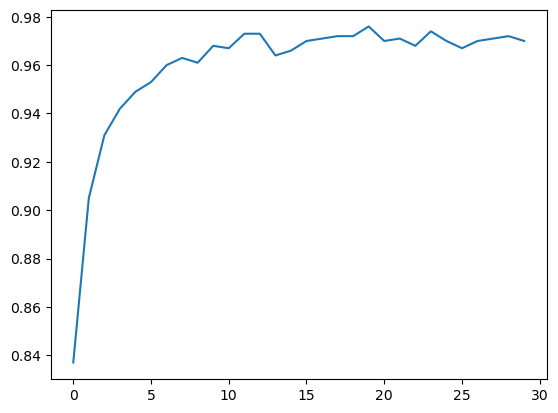

In [30]:
import matplotlib.pyplot as plt
plt.plot(acc3)

In [31]:
acc3=np.array(acc3)

In [32]:
global_model.evaluate(test,one_hot_labels)

32/32 [==============================] - 48s 1s/step - loss: 0.2727 - accuracy: 0.9700


[0.27269187569618225, 0.9700000286102295]

In [33]:
np.save("acc_fedavg_pap.npy",acc3)

In [34]:
global_model.save("fedavg_pap.h5")

C:\Users\91898\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
a = np.load("acc_fedavg_pap.npy")

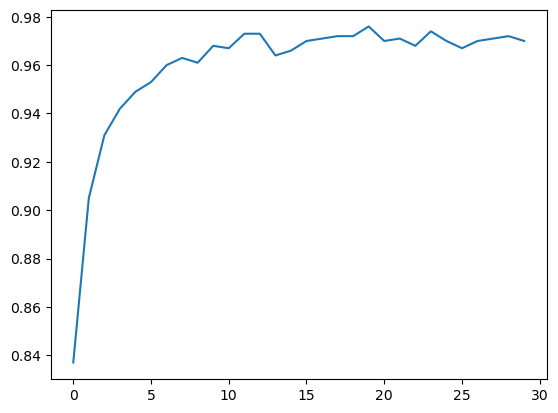

In [36]:
plt.plot(a)